In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from scipy.stats import qmc
from scipy.spatial import Delaunay
import matplotlib.tri as tri

#Aux functions for generate samples
def move_point(max_number, xPoint , yPoint, tolerance):
    r =  np.random.uniform(0, 1)
    n = max_number
    if r > 0.5:
        if xPoint >= max_number*(1.0-tolerance): 
            xPoint = n
        if yPoint >= max_number*(1.0-tolerance): 
            yPoint = n
        if xPoint <= max_number*tolerance: 
            xPoint = 0
        if yPoint <= max_number*tolerance: 
            yPoint = 0
    else:
        if xPoint <= max_number*tolerance: 
            xPoint = 0            
        if yPoint <= max_number*tolerance: 
            yPoint = 0
        if xPoint >= max_number*(1.0-tolerance): 
            xPoint = n
        if yPoint >= max_number*(1.0-tolerance): 
            yPoint = n
    #print("returning", xPoint, yPoint)
    return (xPoint, yPoint)

def add_box(arr, tolerance):
    box = [[0, 0], [1, 1], [0, 1], [1, 0]]
    arr = np.append(arr, box, axis=0)
    np.unique(arr, axis=0)

    maxNumber = max(max(arr[:,0]), max(arr[:,1]))
    for i in range(0, len(arr)):
        new_p = move_point(1, arr[i,0], arr[i,1], tolerance)
        arr[i,0] = new_p[0]
        arr[i,1] = new_p[1]
    return arr
    

# Mesh samples generation

Elegir la cantidad de vértices que deben tener las mallas 

In [2]:
# 10
tolerance = 0.1 # max distance sfrom the boundary
radius = 0.5 #Poisson
numVertices = 10 #Random points
PointsperLine = 3 # Uniform
areaMax = 0.085 #Semiuniform

# 500
tolerance = 0.02 # max distance from the boundary
radius = 0.034 #Poisson
numVertices = 500 #Random points
PointsperLine = 23 # Uniform
areaMax = 0.0017 #Semiuniform

# 1500 vértices
tolerance = 0.02 # max distance from the boundary
radius = 0.02 #Poisson
numVertices = 1500 #Random points
PointsperLine = 39 # Uniform
areaMax = 0.000522 #Semiuniform



# Generación de Poisson triangulation

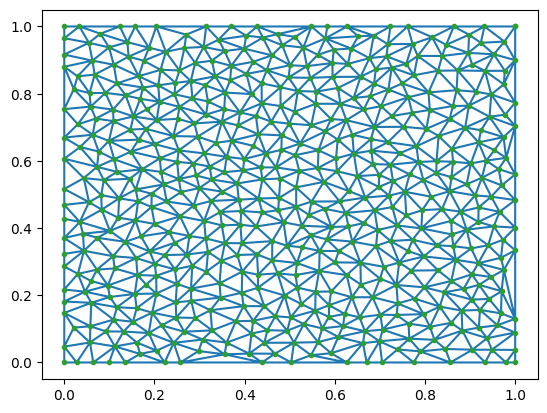

Number of points:  540


In [3]:
rng = np.random.default_rng()
engine = qmc.PoissonDisk(d=2, radius=radius, seed=rng)
sample = engine.fill_space()

sample = add_box(sample, tolerance)
poissonTriangulation = Delaunay(sample)
plt.triplot(sample[:,0], sample[:,1], poissonTriangulation.simplices.copy())
plt.plot(sample[:,0], sample[:,1], '.')
plt.show()
print("Number of points: ", len(sample))

poissonPoints = sample
poissonTriangles = poissonTriangulation.simplices.copy()

Mover puntos cercanos al borde, al borde

# Generación de random triangulation

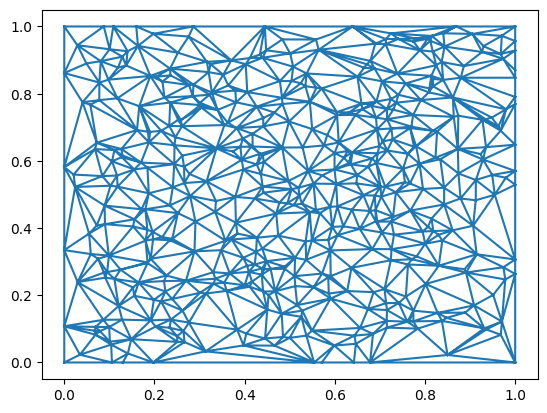

Number of points:  502


In [4]:


RandomSample = np.random.rand(numVertices - 2,2)
RandomSample = add_box(RandomSample, tolerance)

randomDelaunay = Delaunay(RandomSample)
plt.triplot(RandomSample[:,0], RandomSample[:,1], randomDelaunay.simplices.copy())
plt.show()
print("Number of points: ", len(RandomSample))

randomPoints = RandomSample
randomTriangles = randomDelaunay.simplices.copy()


# Generate uniform grid

Number of points:  529


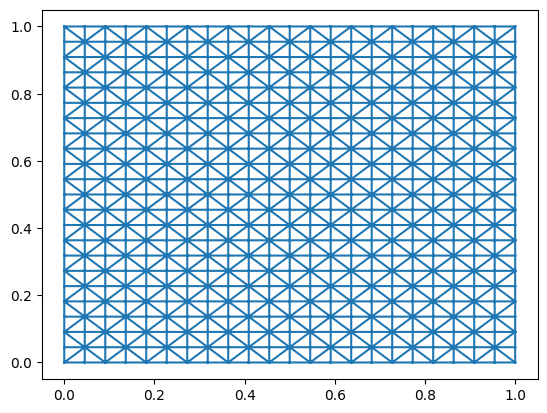

In [5]:
import meshzoo

UniformPoints, UniformTriangles = meshzoo.rectangle_tri(
    np.linspace(0.0, 1.0, PointsperLine),
    np.linspace(0.0, 1.0, PointsperLine),
    variant="zigzag",  # or "up", "down", "center"
)

plt.triplot(UniformPoints[:,0], UniformPoints[:,1], UniformTriangles)

print("Number of points: ", len(UniformPoints))


# semiuniform mesh

Number of points:  497


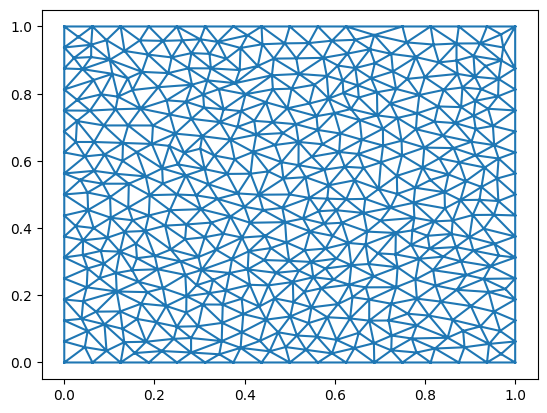

In [6]:
import triangle



t = triangle.triangulate({'vertices': [[0,1],[1,1],[1,0],[0,0]], 'segments': [[0,1],[1,2],[2,3],[3,0]]}, 'qa' + str(areaMax))
ver = t['vertices'].tolist()
simplex = t['triangles'].tolist()

ver = np.array(ver)

plt.triplot(ver[:,0], ver[:,1], simplex)

print("Number of points: ", len(ver))

semiUniformPoints = ver
semiUniformTriangles = simplex

# Generacion del .off

In [7]:
#Num of vertices and simplices
print(len(sample), len(poissonTriangulation.simplices))
print(len(ver), len(simplex))
print(len(UniformPoints), len(UniformTriangles))
print(len(RandomSample), len(randomDelaunay.simplices))

import meshio
#writte .OFF files
meshio.write_points_cells(str(numVertices) + "poisson.off", poissonPoints, [("triangle", poissonTriangles)])
meshio.write_points_cells(str(numVertices) + "random.off", randomPoints, [("triangle", randomTriangles)])
meshio.write_points_cells(str(numVertices) + "uniform.off", UniformPoints, [("triangle", UniformTriangles)])
meshio.write_points_cells(str(numVertices) + "semiUniform.off", semiUniformPoints, [("triangle", semiUniformTriangles)])



540 1017
497 930
529 968
502 966


Warning: OFF requires 3D points, but 2D points given. Appending 0 as third component.

Warning: OFF requires 3D points, but 2D points given. Appending 0 as third component.

Warning: OFF requires 3D points, but 2D points given. Appending 0 as third component.

Warning: OFF requires 3D points, but 2D points given. Appending 0 as third component.

# Call polylla

In [8]:
import os

os.system(".\Polylla.exe " + str(numVertices) + "poisson.off " + str(numVertices) + "poisson.polylla")
os.system(".\Polylla.exe " + str(numVertices) + "random.off " + str(numVertices) + "random.polylla")
os.system(".\Polylla.exe " + str(numVertices) + "uniform.off " + str(numVertices) + "uniform.polylla")
os.system(".\Polylla.exe " + str(numVertices) + "semiUniform.off " + str(numVertices) + "semiUniform.polylla")

print(".\Polylla.exe " + str(numVertices) + "random.off " + str(numVertices) + "random.polylla")


.\Polylla.exe 500random.off 500random.polylla


# Create .mat

In [9]:
from createmat import createmat

createmat(str(numVertices) + "poisson.polylla")
createmat(str(numVertices) + "random.polylla")
createmat(str(numVertices) + "uniform.polylla")
createmat(str(numVertices) + "semiUniform.polylla")

Reading file: 500poisson.polylla.ale
Reading file: 500random.polylla.ale
Reading file: 500uniform.polylla.ale
Reading file: 500semiUniform.polylla.ale


d:\Dropbox\Doctorado\Investigacion\VirtualElementMethods\polyllaMeshes\createmat.py:76: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np_regions = np.array(np_regions)
